In [2]:
import numpy as np

### The basic idea of k-Nearest Neighbours classifier is that we find the k closest datapoints  in the training ponits set with respect to our query x. 

In [3]:
# let's start with a simple example
# suppose we have the following datapoints 
X_train = np.array([[1,6],[2,2],[3,7],[5,4],[6,8],[6,1],[7,5]])
# and their labels are
y_train = np.array([0,0,0,1,1,1,1]) # here we have only two classes 0 or 1 

In [4]:
# let's say we want to classify the following point
x = np.array([[1,2]]) 

In [32]:
# first step is we need to compute the distance between x and every point in the training set.
# we will use the Euclidean Distance as the distance measure
distances = np.sqrt(np.sum((X_train-x)**2,axis=1))
distances

array([4.        , 1.        , 5.38516481, 4.47213595, 7.81024968,
       5.09901951, 6.70820393])

In [34]:
# axis=1是将数组的两列相加得到新的一列
test = np.sum((X_train-x)**2, axis=1)
print(test)

[16  1 29 20 61 26 45]


In [38]:
# Next is  to identify the nearest neighbours
# argsort是将数组中的元素从小到大排列，并返回对应的索引
indices = np.argsort(distances,axis=0)
indices

array([1, 0, 3, 5, 2, 6, 4])

In [6]:
# Choose the k nearest neighbours. Let's say k=3 
# this means we will look at the labels of the closest 3 neighbours 
k = 3
closest_y = y_train[indices[:k]]
closest_y

array([0, 0, 1])

In [7]:
# Count the number of occurrences of each class and find the most common class
# np.bincount(closest_y)用于统计次数
y_pred = np.argmax(np.bincount(closest_y))
y_pred 

0

## 实现过程
### 第一步计算距离，使用sum和sqrt方法
### 第二步对距离从小到大排序并找出离得最近的三个点，使用argsort
### 统计这三个点中类的次数最多的一个类

## Lab Exercises 
#### Let's work on the MNIST dataset

In [42]:
import pickle, gzip

# load the MNIST Dataset
f = gzip.open('mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

(50000, 784) (10000, 784) (10000, 784)


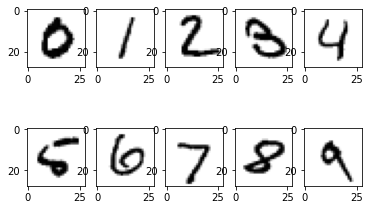

In [43]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(teset[0][im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [53]:
# we will be using only few of the dataset 
# tread samples of tset for training 
tread = 10000
Xtrain = tset[0][:tread,:]
ytrain = tset[1][:tread]
# teread samples of the teset for testing
teread = 1000
Xtest = teset[0][:teread,:]
ytest = teset[1][:teread]

In [65]:
##########################################################
# TDOD: Implement compute distance function. 
# Use the Xtest array for computig the distances
# array between the training set and the testing set. 
###########################################################

def compute_distances(Xtrain, X):
    # Xtrain is a numpy array of shape (num_train, D) containing the training data
    #           consisting of num_train samples each of dimension D.
    # X is a numpy array of shape (num_test, D) containing the testing data
    #           consisting of num_test samples each of dimension D.
    num_test = X.shape[0]
    num_train = Xtrain.shape[0]
    distances = np.zeros((num_test,num_train))
    
    #############################################################################

    # TODO: Compute the L2 distance between the ith test sample and all training 
    # samples and store it in  distances[i,:]

    #############################################################################
    
    for i in range(num_test):
        distances[i,:] = np.sqrt(np.sum((Xtrain-X[i])**2, axis=1))
    
    #############################################################################
    # End of your code 
    #############################################################################

    return distances

In [67]:
# Test your implememntation here
distances = None
distances = compute_distances(Xtrain, Xtest)

In [80]:
# TODO: implement predict function. 
# Use the computed ditsances to predict the labels of 
# test points. 
def predict(ytrain, distances, k=1):
    # ytrain is a numpy array of shape (N,) containing the training labels, where
    #     y[i] is the label for X[i].
    num_test = distances.shape[0] #1000
    y_pred = np.zeros(num_test, dtype=np.dtype(int) ) #answer matrix

    #############################################################################
    # TODO: Use the distances computed using the compute_distances method to find 
    # the k nearest neighbour of every test points. Once you have found the k 
    # nearest neghbours, use self.ytrain to find the labels. 
    #
    # Next, find the most common label of these nighbours labels and store the 
    # predicted label of each test sample in  y_pred[i]
    #############################################################################

    for i in range(num_test):
        indices = np.argsort(distances[i],axis=0)
        
        closest_y = ytrain[indices[:k]]
        
        y_pred[i] = np.argmax(np.bincount(closest_y))

    #############################################################################
    # End of your code 
    #############################################################################
    return y_pred

In [81]:
predict(ytrain, distances, k=1)

array([7, 2, 1, 0, 9, 1, 9, 9, 5, 9, 0, 6, 9, 0, 1, 5, 4, 7, 3, 4, 9, 6,
       6, 5, 9, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 8, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 1,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 4, 0, 1, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 3,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8,
       8, 7, 2, 6, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 1, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 3, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 1,

In [82]:
# Test you implementation here 
# For now we will choose k = 1
k = 1
y_pred = predict(ytrain, distances, k)
y_pred[:10]

array([7, 2, 1, 0, 9, 1, 9, 9, 5, 9])

In [83]:
# let's compute the accuracy - the fraction of correctly predicted examples 
# NOTE: you should expect the accuracy to be around 92%  
num_test = ytest.shape[0] # number of test samples 
num_correct = np.sum(y_pred == ytest) # number of correct classifications
accuracy = float(num_correct) / num_test # accuracy 
print('Accuracy : ' ,accuracy*100,'%')

Accuracy :  92.0 %


In [84]:
# TODO: Test your implementation with different k values 
# and find what the best k value in k_values list
# here we choose the possible values to be 1,3,5,10,100 
# but you can try any value you like 
k_values = [1, 3, 5, 10, 100]

In [85]:
# NOTE: In Machine Learning, we need to do cross validation to choose the right k value for our model
# Can you implement cross validation on our model to find the best k value? 